# <center>5_感知机

# 利用感知机分类以下数据集

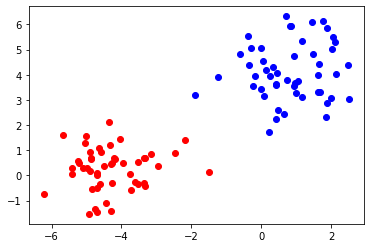

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
XX,yy = make_blobs(n_samples=100, centers=2, n_features=2,random_state=3)
m = XX.shape[0]
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');

## 接下来我们寻找符合条件的的omega和b

In [30]:
omega=np.zeros((1,2))
b=0
flag=1
while(flag!=0):
    flag=0
    for i in range(0,100,1):
        y=float(yy[i])
        if y==0:
            y=-1
        x=(XX[i]).reshape(2,1)
        a=y*(np.dot(omega,x)+b)
        if a<0 or a==0 :
            flag=flag+1
            omega=omega+y*x.T
            b=b+y
    

## 通过while循环我们找到了一组符合条件的omega和b，接下来进行画图。

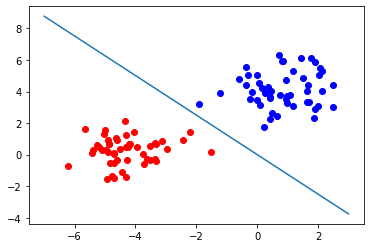

In [31]:
x0 = np.linspace(-7,3,100)
y0=-(omega[0][0]/omega[0][1])*x0-b/omega[0][1]
plt.plot(x0,y0)
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');

### 由上图可以发现，此直线可以将两个数据集分开。

===============================================================================================================

# 利用多层感知机分类以下数据集

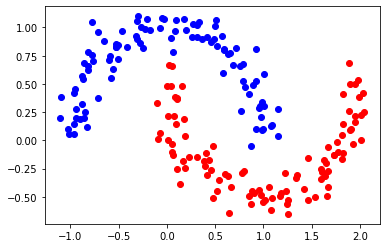

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets.samples_generator import make_moons
from sklearn.model_selection import train_test_split
import mglearn
XX,yy = make_moons(n_samples=200, shuffle=True, noise=0.1, random_state=8)
m = XX.shape[0]
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plt.plot(XX[np.where(yy == 0),0],XX[(np.where(yy == 0)),1],'bo');

Accuracy on training set: 1.00
Accuracy on test set: 0.98


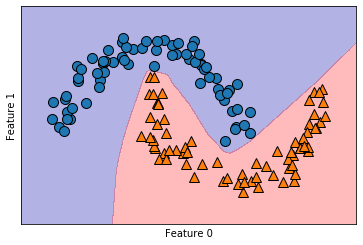

In [5]:
split_test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=split_test_size,stratify=yy,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

 ### 默认情况下，MLP使用了100个隐节点，我们可以减少其数量（从而降低模型的复杂度），但仍可以得到不错的结果（下图所示）

Accuracy on training set: 0.88
Accuracy on test set: 0.87


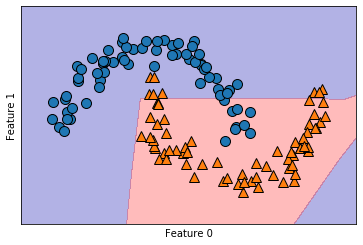

In [38]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

### 如上图所示，可见在只有10 个隐单元时，决策边界看起来参差不齐。如果使用单隐层，那么决策函数将由 10 个直线段组成。如果想得到更加平滑的决策边界，可以采取添加更多的隐单元、添加第二个隐层等方法。下图中我们使用两个隐层，每个包含10个单元

Accuracy on training set: 0.90
Accuracy on test set: 0.90


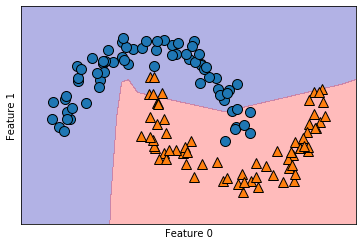

In [39]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

### 默认的非线性是 relu，如上图所示。如果想得到更加平滑的决策边界，我们使用 tanh 非线性。（如下图所示）

Accuracy on training set: 1.00
Accuracy on test set: 1.00


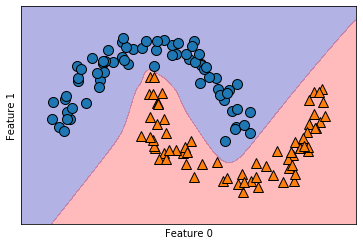

In [40]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))